In [3]:
## Utility and basics
import pandas as pd 
import numpy as np          # numerical computations, arrays, math functions
import datetime as dt       # date and time manipulation
import re                   # regular expressions for string pattern matching
import json                 # working with JSON data

## Charting and visualisation
import matplotlib.pyplot as plt   # low-level plotting
import seaborn as sns            # statistical plots built on matplotlib
import plotly

## For analysis
import scipy.stats as stats      # hypothesis testing, distributions, etc.

In [ ]:
## Test with Chatgpt to extract the files to start working on them. Works on Macbook, not other models
import subprocess
import os
import pandas as pd
import sqlite3

# === Settings ===
rar_filename = "conjunto de dados - student.rar"           # Your .rar file
extract_dir = "extracted_files"     # Folder to extract into

# === Step 1: Extract using unar ===
os.makedirs(extract_dir, exist_ok=True)

try:
    result = subprocess.run(
        ['unar', '-o', extract_dir, rar_filename],
        check=True,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    print("✅ Extraction successful!")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(" Extraction failed:")
    print(e.stderr)
    exit()

# === Step 2: Auto-detect and load supported files ===
def load_file(filepath):
    if filepath.endswith('.csv'):
        return pd.read_csv(filepath)
    elif filepath.endswith('.pkl') or filepath.endswith('.pickle'):
        return pd.read_pickle(filepath)
    elif filepath.endswith('.parquet'):
        return pd.read_parquet(filepath)
    elif filepath.endswith('.db') or filepath.endswith('.sqlite'):
        conn = sqlite3.connect(filepath)
        tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
        if tables.empty:
            conn.close()
            return None
        table_name = tables.iloc[0, 0]
        df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
        conn.close()
        return df
    return None

# === Step 3: Recursively find and load files ===
loaded_dfs = {}
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        full_path = os.path.join(root, file)
        df = load_file(full_path)
        if df is not None:
            print(f"\n📄 Loaded: {file}")
            print(df.head())
            loaded_dfs[file] = df

if not loaded_dfs:
    print(" No supported data files found in the archive.")


✅ Extraction successful!
conjunto de dados - student.rar: RAR 5
  conjunto de dados - student/atributos dos conjuntos de dados.txt  (3780 B)... OK.
  conjunto de dados - student/student-mat.csv  (56993 B)... OK.
  conjunto de dados - student/student-por.csv  (93220 B)... OK.
  conjunto de dados - student/  (dir)... OK.
Successfully extracted to "extracted_files/conjunto de dados - student-1".


📄 Loaded: student-por.csv
  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                

In [4]:
df = pd.read_csv("extracted_files/conjunto de dados - student/student-por.csv", sep=";")
  # or "student-mat.csv"

print(df.shape)
print(df.columns)
print(df.head())
print(df.describe())
print(df.dtypes)

(649, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        

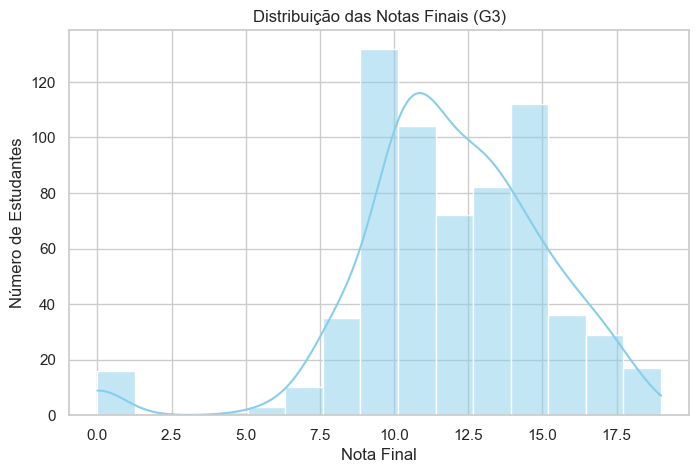

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots show inside the notebook
%matplotlib inline  

# Optional: set a visual theme
sns.set(style="whitegrid")

# Plot the histogram of the 'G3' (final grade) column
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title("Distribuição das Notas Finais (G3)")
plt.xlabel("Nota Final")
plt.ylabel("Número de Estudantes")
plt.show()

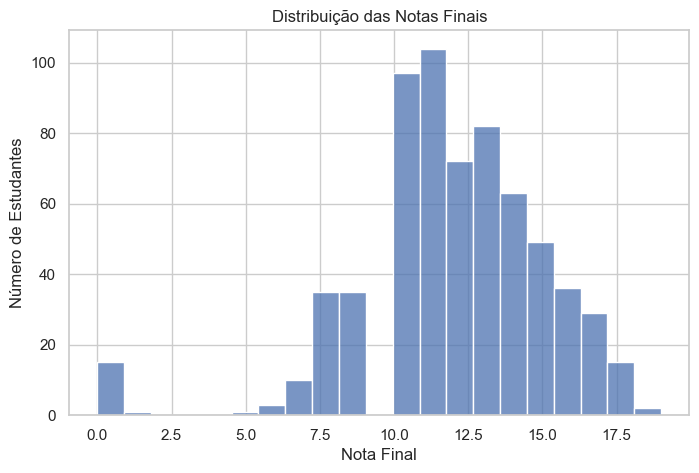

In [30]:
%matplotlib inline
plt.figure(figsize=(8, 5))
sns.histplot(df["G3"])
plt.title("Distribuição das Notas Finais")
plt.xlabel("Nota Final")
plt.ylabel("Número de Estudantes")
plt.show()

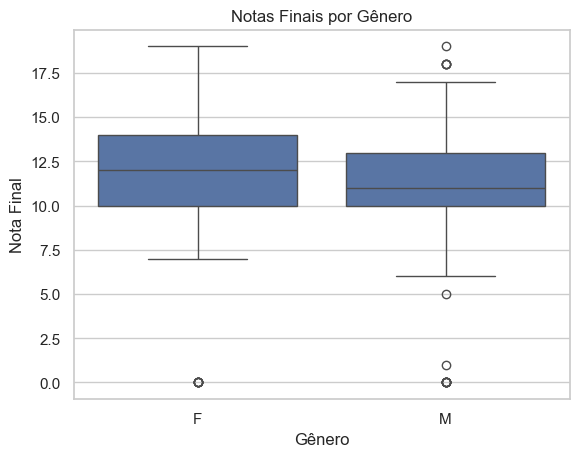

In [31]:
sns.boxplot(x="sex", y="G3", data=df)
plt.title("Notas Finais por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota Final")
plt.show()


In [32]:
df[['G1', 'G2', 'G3']].describe()


,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


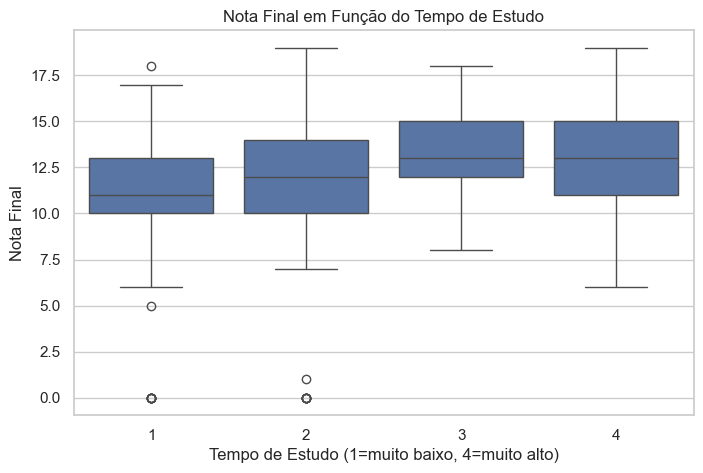

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Nota Final em Função do Tempo de Estudo')
plt.xlabel('Tempo de Estudo (1=muito baixo, 4=muito alto)')
plt.ylabel('Nota Final')
plt.show()

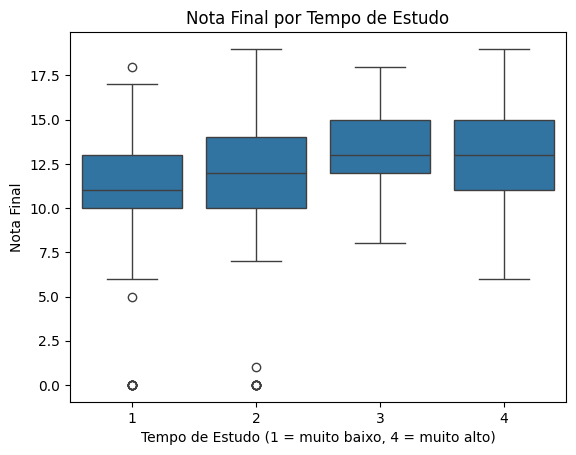

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Nota Final por Tempo de Estudo")
plt.xlabel("Tempo de Estudo (1 = muito baixo, 4 = muito alto)")
plt.ylabel("Nota Final")
plt.show()

In [6]:
from scipy.stats import spearmanr

rho, pval = spearmanr(df['studytime'], df['G3'])
print(f"Spearman correlation: {rho:.2f}")
print(f"P-value: {pval:.4f}")

Spearman correlation: 0.27
P-value: 0.0000


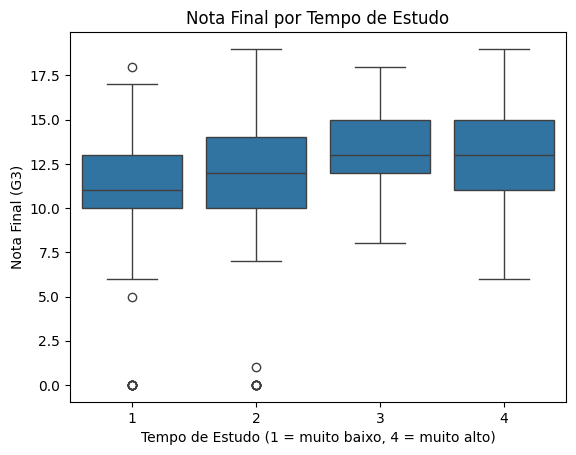

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Nota Final por Tempo de Estudo")
plt.xlabel("Tempo de Estudo (1 = muito baixo, 4 = muito alto)")
plt.ylabel("Nota Final (G3)")
plt.show()

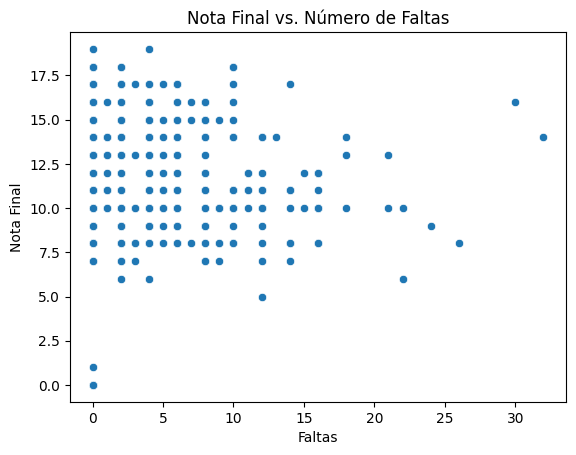

ρ = -0.16, p = 0.0000


In [8]:
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Nota Final vs. Número de Faltas")
plt.xlabel("Faltas")
plt.ylabel("Nota Final")
plt.show()

from scipy.stats import spearmanr
corr, pval = spearmanr(df['absences'], df['G3'])
print(f"ρ = {corr:.2f}, p = {pval:.4f}")

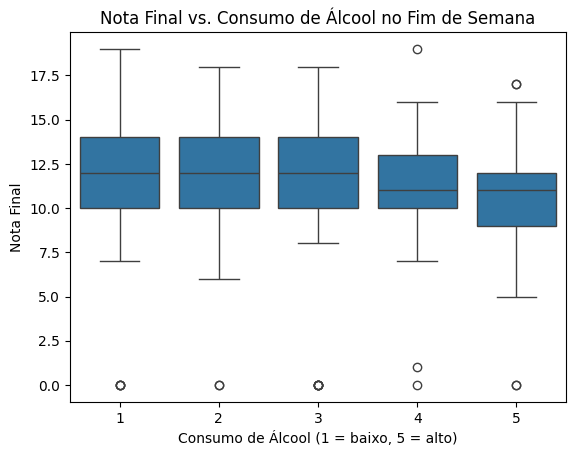

In [9]:
sns.boxplot(x='Walc', y='G3', data=df)
plt.title("Nota Final vs. Consumo de Álcool no Fim de Semana")
plt.xlabel("Consumo de Álcool (1 = baixo, 5 = alto)")
plt.ylabel("Nota Final")
plt.show()

corr, pval = spearmanr(df['Walc'], df['G3'])

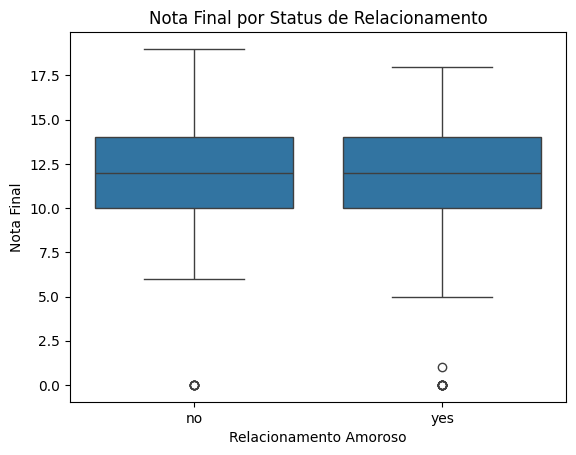

U = 44804.5, p = 0.0672


In [10]:
sns.boxplot(x='romantic', y='G3', data=df)
plt.title("Nota Final por Status de Relacionamento")
plt.xlabel("Relacionamento Amoroso")
plt.ylabel("Nota Final")
plt.show()

from scipy.stats import mannwhitneyu
romantic_yes = df[df['romantic'] == 'yes']['G3']
romantic_no = df[df['romantic'] == 'no']['G3']
u_stat, pval = mannwhitneyu(romantic_yes, romantic_no)
print(f"U = {u_stat}, p = {pval:.4f}")

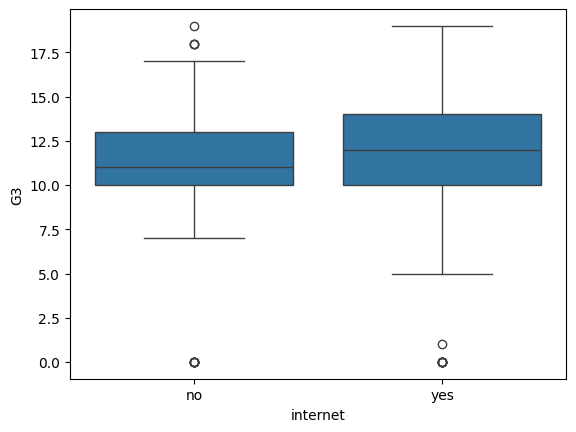

In [11]:
sns.boxplot(x='internet', y='G3', data=df)
internet_yes = df[df['internet'] == 'yes']['G3']
internet_no = df[df['internet'] == 'no']['G3']
u_stat, pval = mannwhitneyu(internet_yes, internet_no)

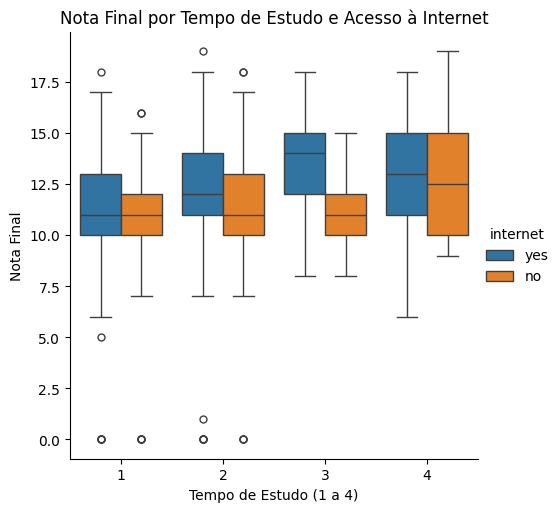

In [12]:
import seaborn as sns
sns.catplot(data=df, x="studytime", y="G3", hue="internet", kind="box")
plt.title("Nota Final por Tempo de Estudo e Acesso à Internet")
plt.xlabel("Tempo de Estudo (1 a 4)")
plt.ylabel("Nota Final")
plt.show()

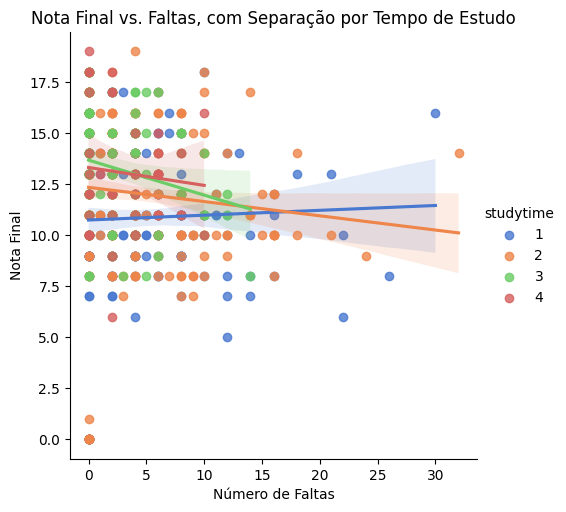

In [13]:
import seaborn as sns
sns.lmplot(data=df, x="absences", y="G3", hue="studytime", palette="muted")
plt.title("Nota Final vs. Faltas, com Separação por Tempo de Estudo")
plt.xlabel("Número de Faltas")
plt.ylabel("Nota Final")
plt.show()

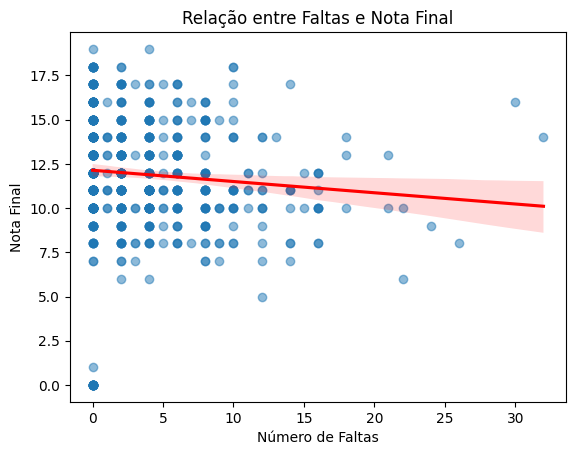

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x='absences', y='G3', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Relação entre Faltas e Nota Final")
plt.xlabel("Número de Faltas")
plt.ylabel("Nota Final")
plt.show()

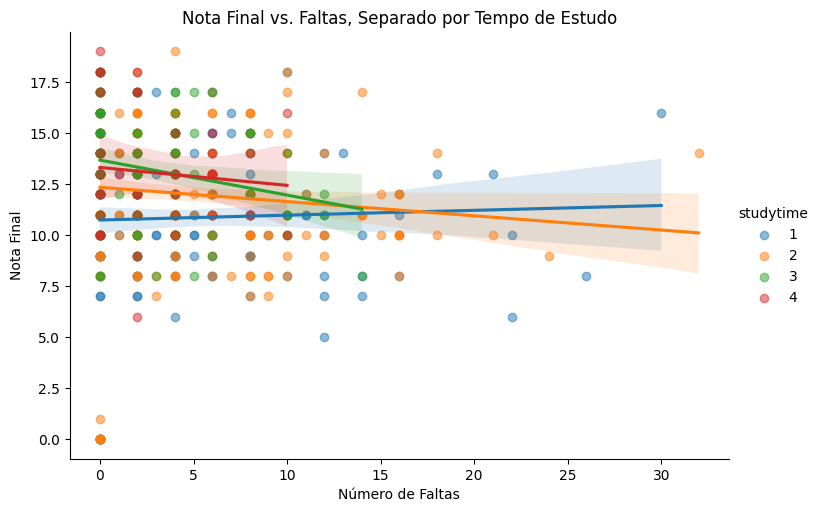

In [15]:
sns.lmplot(data=df, x='absences', y='G3', hue='studytime', aspect=1.5, height=5, scatter_kws={'alpha':0.5})
plt.title("Nota Final vs. Faltas, Separado por Tempo de Estudo")
plt.xlabel("Número de Faltas")
plt.ylabel("Nota Final")
plt.show()

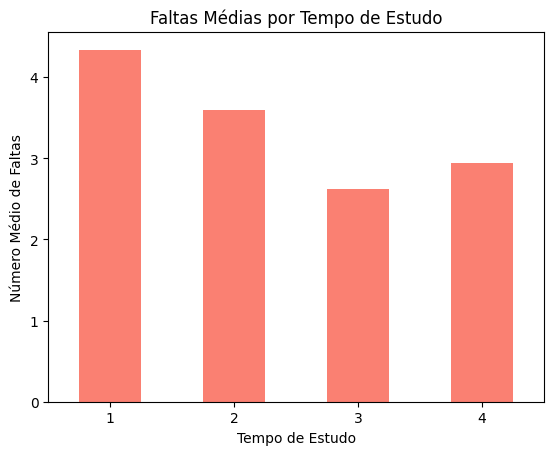

In [17]:
df.groupby('studytime')['absences'].mean().plot(kind='bar', color='salmon')
plt.title('Faltas Médias por Tempo de Estudo')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Número Médio de Faltas')
plt.xticks(rotation=0)
plt.show()


In [19]:
summary = df.groupby('studytime')['G3'].agg(['mean', 'std', 'count']).round(2)
print(summary)

            mean   std  count
studytime                    
1          10.84  3.22    212
2          12.09  3.24    305
3          13.23  2.50     97
4          13.06  3.04     35


In [20]:
df.groupby('studytime')['absences'].agg(['mean', 'median', 'count']).round(2)


,mean,median,count
studytime,,,
1,4.34,4.0,212
2,3.60,2.0,305
3,2.62,2.0,97
4,2.94,2.0,35


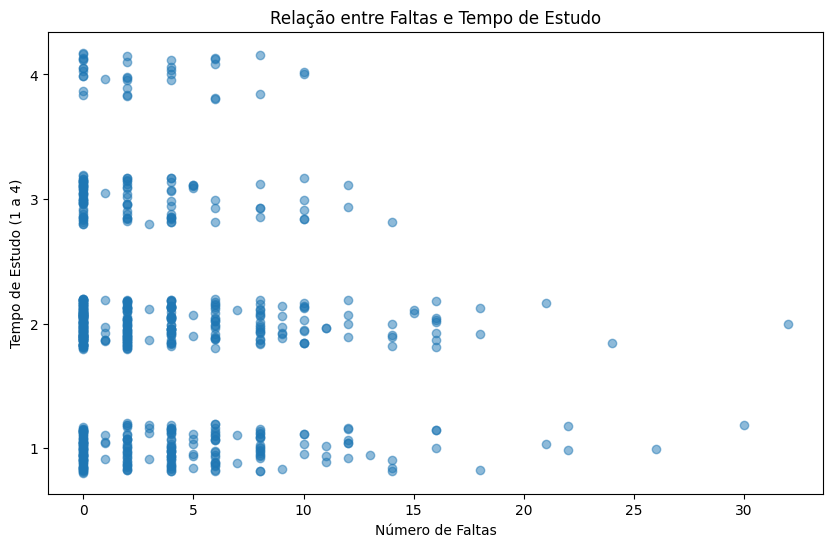

In [21]:
plt.figure(figsize=(10,6))

# jitter no eixo y (tempo de estudo)
y_jitter = df['studytime'] + np.random.uniform(-0.2, 0.2, size=len(df))

plt.scatter(df['absences'], y_jitter, alpha=0.5)
plt.xlabel('Número de Faltas')
plt.ylabel('Tempo de Estudo (1 a 4)')
plt.title('Relação entre Faltas e Tempo de Estudo')
plt.yticks([1,2,3,4])
plt.show()

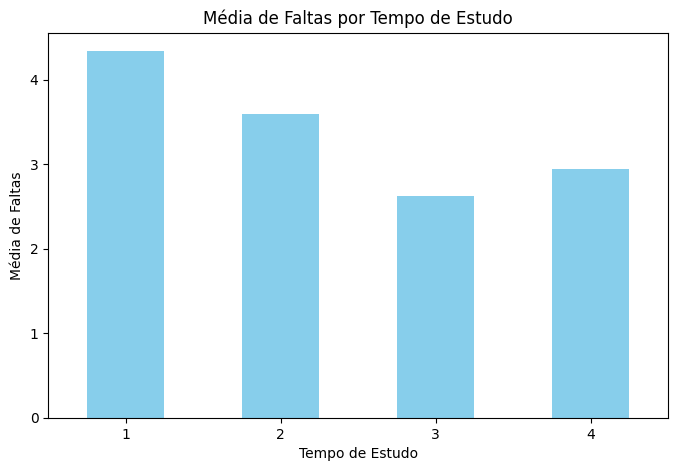

In [22]:
media_faltas = df.groupby('studytime')['absences'].mean()

plt.figure(figsize=(8,5))
media_faltas.plot(kind='bar', color='skyblue')
plt.title('Média de Faltas por Tempo de Estudo')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Média de Faltas')
plt.xticks(rotation=0)
plt.show()

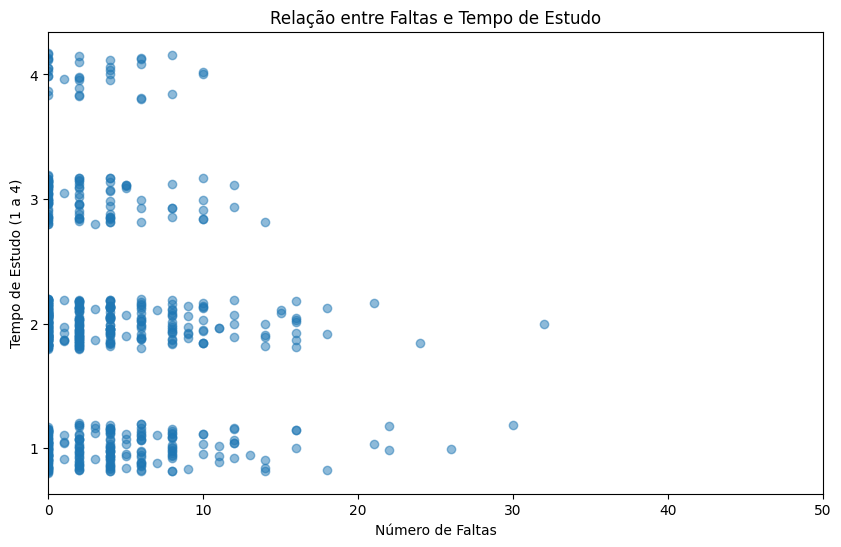

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['absences'], y_jitter, alpha=0.5)
plt.xlim(0, 50)  # ajusta o limite máximo do eixo X para 50 faltas, por exemplo
plt.xlabel('Número de Faltas')
plt.ylabel('Tempo de Estudo (1 a 4)')
plt.title('Relação entre Faltas e Tempo de Estudo')
plt.yticks([1,2,3,4])
plt.show()

In [24]:
print(df['absences'].head(10))

0    4
1    2
2    6
3    0
4    0
5    6
6    0
7    2
8    0
9    0
Name: absences, dtype: int64


In [25]:
print(df['absences'].unique())


[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


In [26]:
print(df['absences'].value_counts().sort_index())


absences
0     244
1      12
2     110
3       7
4      93
5      12
6      49
7       3
8      42
9       7
10     21
11      5
12     12
13      1
14      8
15      2
16     10
18      3
21      2
22      2
24      1
26      1
30      1
32      1
Name: count, dtype: int64


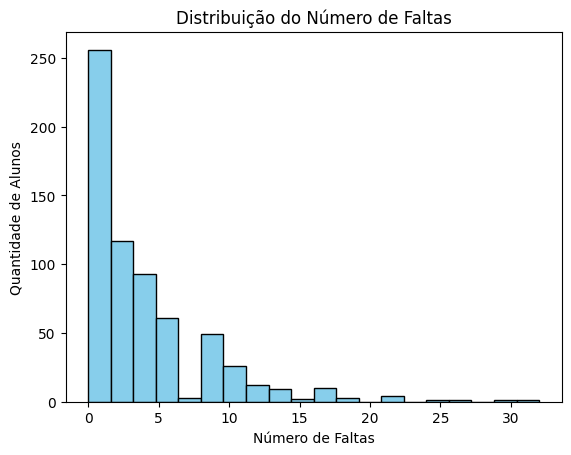

In [27]:
import matplotlib.pyplot as plt

plt.hist(df['absences'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Faltas')
plt.xlabel('Número de Faltas')
plt.ylabel('Quantidade de Alunos')
plt.show()

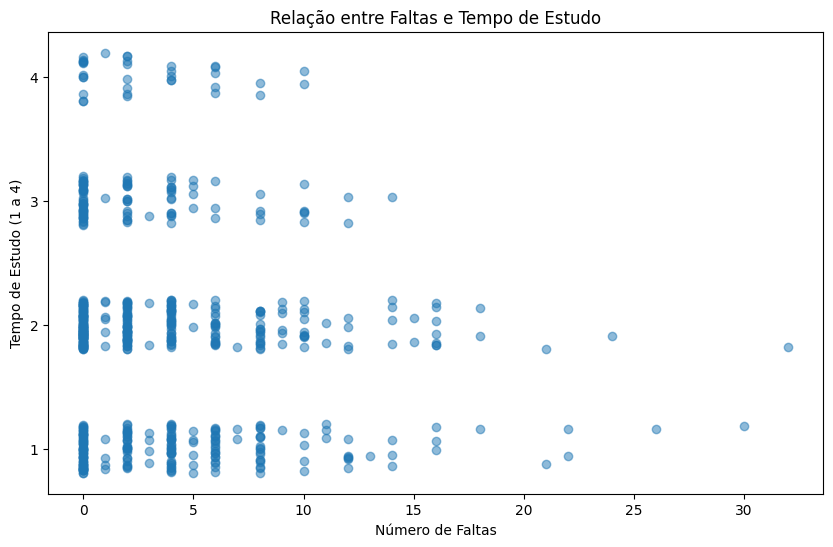

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
y_jitter = df['studytime'] + np.random.uniform(-0.2, 0.2, size=len(df))

plt.scatter(df['absences'], y_jitter, alpha=0.5)
plt.xlabel('Número de Faltas')
plt.ylabel('Tempo de Estudo (1 a 4)')
plt.title('Relação entre Faltas e Tempo de Estudo')
plt.yticks([1,2,3,4])
plt.show()

In [29]:
from scipy.stats import spearmanr

corr, pval = spearmanr(df['studytime'], df['absences'])
print(f"Correlação de Spearman: {corr:.3f}, p-valor: {pval:.4f}")

Correlação de Spearman: -0.117, p-valor: 0.0028


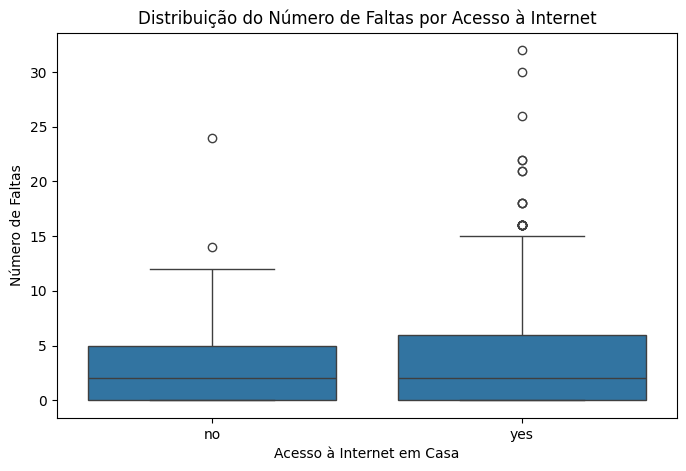

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='internet', y='absences', data=df)
plt.title('Distribuição do Número de Faltas por Acesso à Internet')
plt.xlabel('Acesso à Internet em Casa')
plt.ylabel('Número de Faltas')
plt.show()

In [31]:
from scipy.stats import mannwhitneyu

faltas_internet_yes = df[df['internet'] == 'yes']['absences']
faltas_internet_no = df[df['internet'] == 'no']['absences']

u_stat, p_val = mannwhitneyu(faltas_internet_yes, faltas_internet_no)
print(f"Estatística U: {u_stat}, p-valor: {p_val:.4f}")

Estatística U: 39305.5, p-valor: 0.3829


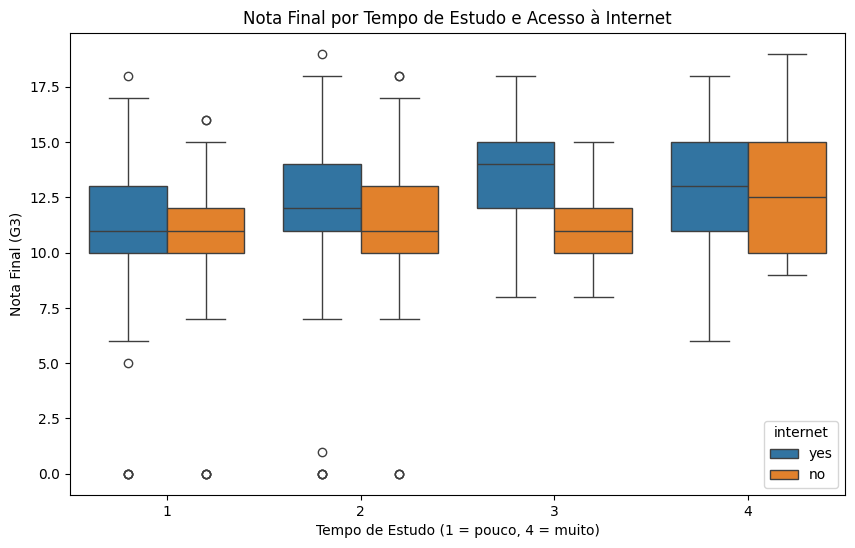

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='studytime', y='G3', hue='internet')
plt.title('Nota Final por Tempo de Estudo e Acesso à Internet')
plt.xlabel('Tempo de Estudo (1 = pouco, 4 = muito)')
plt.ylabel('Nota Final (G3)')
plt.show()

In [34]:
media_grupos = df.groupby(['studytime', 'internet'])['G3'].mean().unstack()
print(media_grupos)


internet          no        yes
studytime                      
1          10.264151  11.037736
2          11.347222  12.321888
3          11.055556  13.721519
4          13.125000  13.037037
